In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [24]:
# Import the requests library
import requests
#requests.__version__

In [25]:
# Import the API key
from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31136f2fcced0d9407630756aa15f0d7


In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | villazon
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | nkawkaw
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | tezu
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 14 of Set 1 | ust-kalmanka
Processing Record 15 of Set 1 | melfi
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | port hardy
Processing Record 20 of Set 1 | nuuk
Processing Record 2

Processing Record 38 of Set 4 | olafsvik
Processing Record 39 of Set 4 | tehachapi
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | xichang
Processing Record 43 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 4 | rincon
Processing Record 45 of Set 4 | satitoa
City not found. Skipping...
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | barbar
City not found. Skipping...
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | summerville
Processing Record 3 of Set 5 | coari
Processing Record 4 of Set 5 | puerto del rosario
Processing Record 5 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 5 | warqla
City not found. Skipping...
Processing Record 7 of Set 5 | srednekolymsk
Processing Record 8 of Set 5 | hi

Processing Record 30 of Set 8 | vysokogornyy
Processing Record 31 of Set 8 | canutama
Processing Record 32 of Set 8 | xghajra
City not found. Skipping...
Processing Record 33 of Set 8 | pridonskoy
Processing Record 34 of Set 8 | burnie
Processing Record 35 of Set 8 | sangar
Processing Record 36 of Set 8 | kontagora
Processing Record 37 of Set 8 | kaduqli
Processing Record 38 of Set 8 | mpika
Processing Record 39 of Set 8 | porto novo
Processing Record 40 of Set 8 | clyde river
Processing Record 41 of Set 8 | coffs harbour
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | muana
Processing Record 44 of Set 8 | waycross
Processing Record 45 of Set 8 | vershino-shakhtaminskiy
Processing Record 46 of Set 8 | dno
Processing Record 47 of Set 8 | katangli
Processing Record 48 of Set 8 | ponte de sor
Processing Record 49 of Set 8 | lolua
City not found. Skipping...
Processing Record 50 of Set 8 | tyrma
Processing Record 1 of Set 9 | lahij
Processing Record 2 of Set 9 

Processing Record 21 of Set 12 | praia da vitoria
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 24 of Set 12 | ossora
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | auki
Processing Record 27 of Set 12 | oranjemund
Processing Record 28 of Set 12 | zhuravky
Processing Record 29 of Set 12 | enshi
Processing Record 30 of Set 12 | nabire
Processing Record 31 of Set 12 | mackay
Processing Record 32 of Set 12 | teglas
Processing Record 33 of Set 12 | biritiba-mirim
Processing Record 34 of Set 12 | muzhi
Processing Record 35 of Set 12 | beihai
Processing Record 36 of Set 12 | pionerskiy
Processing Record 37 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 38 of Set 12 | port-gentil
Processing Record 39 of Set 12 | birjand
Processing Record 40 of Set 12 | cockburn town
Processing Record 41 of Set 12 | ukiah
Processing Record 42 of Set 12 | marsh harbour

In [29]:
print(len(city_data))

582


In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,78.80,89,40,12.66,MU,2021-02-06 07:12:54
1,Punta Arenas,-53.1500,-70.9167,42.80,70,75,8.05,CL,2021-02-06 07:17:40
2,Cape Town,-33.9258,18.4232,71.60,78,40,19.57,ZA,2021-02-06 07:17:38
3,Luderitz,-26.6481,15.1594,74.89,40,0,21.92,NA,2021-02-06 07:18:52
4,Villazon,-22.0866,-65.5942,49.21,79,100,6.46,BO,2021-02-06 07:19:17
5,Leningradskiy,69.3833,178.4167,-10.64,87,100,6.87,RU,2021-02-06 07:18:30
6,Nkawkaw,6.5512,-0.7662,75.61,90,100,2.30,GH,2021-02-06 07:19:17
7,Upernavik,72.7868,-56.1549,12.22,77,100,3.62,GL,2021-02-06 07:17:45
8,Yellowknife,62.4560,-114.3525,-38.00,67,1,3.44,CA,2021-02-06 07:17:52
9,Tezu,27.9167,96.1667,83.68,14,0,4.70,IN,2021-02-06 07:19:18


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

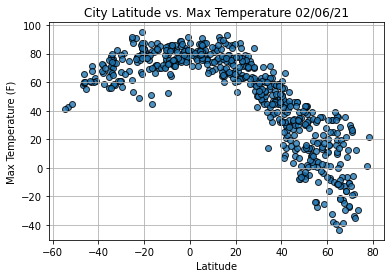

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

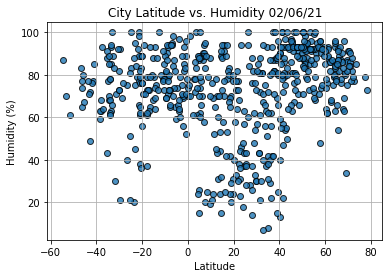

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

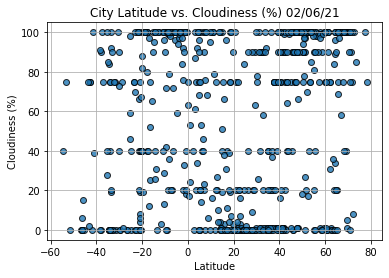

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

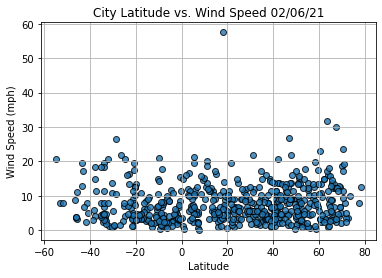

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()